In [114]:
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np 
import datetime as dt
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import re 

In [115]:
df = pd.read_csv('base_data/moradia_eco.csv')
df.head(3)

,5.01. Qual é o material predominante da cobertura da casa?,5.02. Qual é o material predominante das paredes externas da casa?,5.03. Qual é o material predominante no piso interno da casa?,5.04. A casa apresenta quais dos seguintes problemas?,5.04. A casa apresenta quais dos seguintes problemas?/Umidade,5.04. A casa apresenta quais dos seguintes problemas?/Corrente forte de ar,5.04. A casa apresenta quais dos seguintes problemas?/Infiltração de água da chuva/goteiras,5.04. A casa apresenta quais dos seguintes problemas?/Inundação interna,5.04. A casa apresenta quais dos seguintes problemas?/Entrada de insetos e roedores,5.04. A casa apresenta quais dos seguintes problemas?/Calor e/ou frio excessivos,...,5.16. Quais dos seguintes materiais estão presentes no solo do terreno em que está a casa?/Não sabe/ Não respondeu,06.01. Como foi adquirida a casa onde a família mora?,06.02. Quanto foi pago pela casa?,"06.03. Quanto foi gasto, até o momento, com a construção da casa?","06.04. Quanto é pago, mensalmente, pelo aluguel da casa e/ou terreno em que mora?",06.05. Como foi adquirido o terreno da casa onde a família mora?,06.06. Quanto foi pago pelo terreno?,06.07. Qual a situação legal do terreno da casa onde a família mora?,06.08. O responsável pelo lar ou seu/sua parceiro/a é proprietário/a de outra casa ou terreno?,07.01. Sua família tem acesso à água potável para beber e cozinhar (mesmo que a água precise ser obtida fora do terreno)?
0,Telha de metal/zinco,Alvenaria (tijolos ou blocos),Terra,Umidade Infiltração de água da chuva/goteiras ...,1,0,1,0,1,0,...,0,Casa alugada,NaN,NaN,400.0,Terreno próprio doado,NaN,Terreno regularizado (proprietário/a possui es...,Não,Sim
1,Telha de metal/zinco,Madeira própria para construção (madeira apare...,Concreto,Umidade Infiltração de água da chuva/goteiras ...,1,0,1,1,1,1,...,0,Casa própria construída,NaN,999.0,NaN,Terreno próprio doado,NaN,Terreno regularizado (proprietário/a possui es...,Não,Sim
2,Não sabe/Não respondeu,Não sabe/Não respondeu,Não sabe/Não respondeu,Não sabe/Não respondeu,0,0,0,0,0,0,...,0,Não sabe/ Não respondeu,NaN,NaN,NaN,Terreno próprio doado,NaN,Terreno não regularizado (proprietário/a não p...,Não,Sim


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 68 columns):
 #   Column                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                          --------------  -----  
 0   5.01. Qual é o material predominante da cobertura da casa?                                                                      109 non-null    object 
 1   5.02. Qual é o material predominante das paredes externas da casa?                                                              109 non-null    object 
 2   5.03. Qual é o material predominante no piso interno da casa?                                                                   109 non-null    object 
 3   5.04. A casa apresenta quais dos seguintes problemas?                                                    

In [117]:
df.iloc[ :, 0:11].head()

,5.01. Qual é o material predominante da cobertura da casa?,5.02. Qual é o material predominante das paredes externas da casa?,5.03. Qual é o material predominante no piso interno da casa?,5.04. A casa apresenta quais dos seguintes problemas?,5.04. A casa apresenta quais dos seguintes problemas?/Umidade,5.04. A casa apresenta quais dos seguintes problemas?/Corrente forte de ar,5.04. A casa apresenta quais dos seguintes problemas?/Infiltração de água da chuva/goteiras,5.04. A casa apresenta quais dos seguintes problemas?/Inundação interna,5.04. A casa apresenta quais dos seguintes problemas?/Entrada de insetos e roedores,5.04. A casa apresenta quais dos seguintes problemas?/Calor e/ou frio excessivos,5.04. A casa apresenta quais dos seguintes problemas?/Risco de desabamento
0,Telha de metal/zinco,Alvenaria (tijolos ou blocos),Terra,Umidade Infiltração de água da chuva/goteiras ...,1,0,1,0,1,0,0
1,Telha de metal/zinco,Madeira própria para construção (madeira apare...,Concreto,Umidade Infiltração de água da chuva/goteiras ...,1,0,1,1,1,1,0
2,Não sabe/Não respondeu,Não sabe/Não respondeu,Não sabe/Não respondeu,Não sabe/Não respondeu,0,0,0,0,0,0,0
3,Telha de metal/zinco,Madeira própria para construção (madeira apare...,Madeira,Infiltração de água da chuva/goteiras Entrada ...,0,0,1,0,1,0,0
4,Telha de metal/zinco,Madeira própria para construção (madeira apare...,Madeira,Umidade Infiltração de água da chuva/goteiras,1,0,1,0,0,0,0


In [118]:
df.columns = df.columns.map(lambda x: re.sub(r'^\d+\.\d+\.\s*', '', x))
df.head()

,Qual é o material predominante da cobertura da casa?,Qual é o material predominante das paredes externas da casa?,Qual é o material predominante no piso interno da casa?,A casa apresenta quais dos seguintes problemas?,A casa apresenta quais dos seguintes problemas?/Umidade,A casa apresenta quais dos seguintes problemas?/Corrente forte de ar,A casa apresenta quais dos seguintes problemas?/Infiltração de água da chuva/goteiras,A casa apresenta quais dos seguintes problemas?/Inundação interna,A casa apresenta quais dos seguintes problemas?/Entrada de insetos e roedores,A casa apresenta quais dos seguintes problemas?/Calor e/ou frio excessivos,...,Quais dos seguintes materiais estão presentes no solo do terreno em que está a casa?/Não sabe/ Não respondeu,Como foi adquirida a casa onde a família mora?,Quanto foi pago pela casa?,"Quanto foi gasto, até o momento, com a construção da casa?","Quanto é pago, mensalmente, pelo aluguel da casa e/ou terreno em que mora?",Como foi adquirido o terreno da casa onde a família mora?,Quanto foi pago pelo terreno?,Qual a situação legal do terreno da casa onde a família mora?,O responsável pelo lar ou seu/sua parceiro/a é proprietário/a de outra casa ou terreno?,Sua família tem acesso à água potável para beber e cozinhar (mesmo que a água precise ser obtida fora do terreno)?
0,Telha de metal/zinco,Alvenaria (tijolos ou blocos),Terra,Umidade Infiltração de água da chuva/goteiras ...,1,0,1,0,1,0,...,0,Casa alugada,NaN,NaN,400.0,Terreno próprio doado,NaN,Terreno regularizado (proprietário/a possui es...,Não,Sim
1,Telha de metal/zinco,Madeira própria para construção (madeira apare...,Concreto,Umidade Infiltração de água da chuva/goteiras ...,1,0,1,1,1,1,...,0,Casa própria construída,NaN,999.0,NaN,Terreno próprio doado,NaN,Terreno regularizado (proprietário/a possui es...,Não,Sim
2,Não sabe/Não respondeu,Não sabe/Não respondeu,Não sabe/Não respondeu,Não sabe/Não respondeu,0,0,0,0,0,0,...,0,Não sabe/ Não respondeu,NaN,NaN,NaN,Terreno próprio doado,NaN,Terreno não regularizado (proprietário/a não p...,Não,Sim
3,Telha de metal/zinco,Madeira própria para construção (madeira apare...,Madeira,Infiltração de água da chuva/goteiras Entrada ...,0,0,1,0,1,0,...,0,Casa própria construída,NaN,4000.0,NaN,Terreno próprio doado,NaN,Terreno regularizado (proprietário/a possui es...,Sim,Sim
4,Telha de metal/zinco,Madeira própria para construção (madeira apare...,Madeira,Umidade Infiltração de água da chuva/goteiras,1,0,1,0,0,0,...,0,Casa própria construída,NaN,1500.0,NaN,Terreno próprio doado,NaN,Terreno regularizado (proprietário/a possui es...,Sim,Sim


In [119]:
null_cols = df.columns[df.isna().sum() > 0]

for col in null_cols[:-1]:
    null_cols[col].fillna(null_cols[col].mode()[0])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
community_infos = df.rename(columns=
                                {'Qual é o material predominante da cobertura da casa?': 'material de cobertura',
                                    'Qual é o material predominante das paredes externas da casa?': 'material das paredes',
                                    'Qual é o material predominante no piso interno da casa?':'material do piso',
                                    'A casa apresenta quais dos seguintes problemas?':'problems na casa',
                                    })


community_infos.iloc[:, 0:4]

,material de cobertura,material das paredes,material do piso,problems na casa
0,Telha de metal/zinco,Alvenaria (tijolos ou blocos),Terra,Umidade Infiltração de água da chuva/goteiras ...
1,Telha de metal/zinco,Madeira própria para construção (madeira apare...,Concreto,Umidade Infiltração de água da chuva/goteiras ...
2,Não sabe/Não respondeu,Não sabe/Não respondeu,Não sabe/Não respondeu,Não sabe/Não respondeu
3,Telha de metal/zinco,Madeira própria para construção (madeira apare...,Madeira,Infiltração de água da chuva/goteiras Entrada ...
4,Telha de metal/zinco,Madeira própria para construção (madeira apare...,Madeira,Umidade Infiltração de água da chuva/goteiras
...,...,...,...,...
104,Telha de fibrocimento,"Madeira reaproveitada (retalhos de madeira, ma...",Concreto,Infiltração de água da chuva/goteiras Entrada ...
105,Telha de metal/zinco,Madeira própria para construção (madeira apare...,Madeira,Entrada de insetos e roedores Umidade Infiltra...
106,Telha de metal/zinco,"Madeira reaproveitada (retalhos de madeira, ma...",Concreto,Umidade Corrente forte de ar Infiltração de ág...
107,Telha de barro/cerâmica,"Madeira reaproveitada (retalhos de madeira, ma...","Sucata sobre a terra (retalhos de plástico, lo...",Entrada de insetos e roedores Inundação intern...


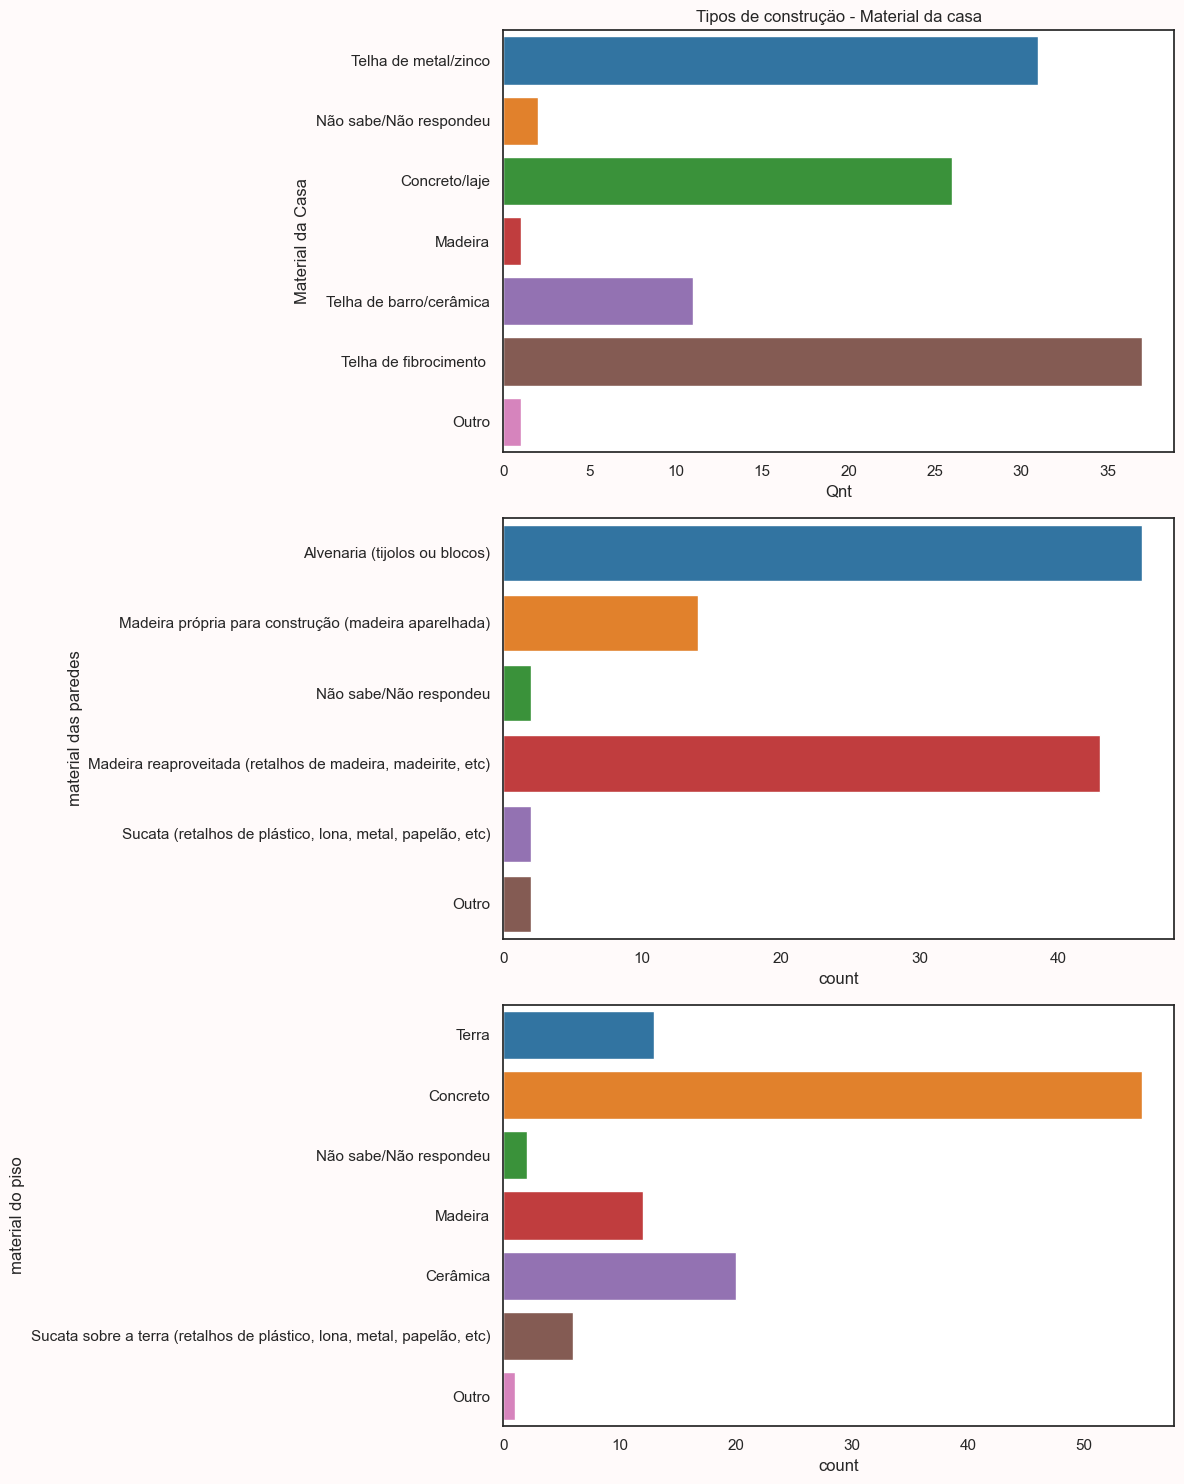

In [147]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
sns.set_context('notebook')
sns.set_style('white')

sns.countplot(data=community_infos, y='material de cobertura', ax=ax0)

ax0.set(title='Tipos de construçäo - Material da casa',
        ylabel='Material da Casa',
        xlabel='Qnt')

sns.countplot(data=community_infos, y='material das paredes', ax=ax1)

ax0.set(title='Tipos de construçäo - Material da casa',
        ylabel='Material da Casa',
        xlabel='Qnt')

sns.countplot(data=community_infos, y='material do piso', ax=ax2)

ax0.set(title='Tipos de construçäo - Material da casa',
        ylabel='Material da Casa',
        xlabel='Qnt')


fig.set_facecolor('snow')

plt.tight_layout()
plt.show()